In [2]:
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
#import mltools as ml
import time


np.random.seed(0)
%matplotlib inline

In [3]:
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X = shuffle(X)
Y = shuffle(Y)

In [4]:
for f in range(X.shape[1]):
    print "Feature #{:3d}".format(f+1)
    print "    min:      {}".format(min(X[:,f]))
    print "    max:      {}".format(max(X[:,f]))
    print "    mean:     {}".format(np.mean(X[:,f]))
    print "    variance: {}".format(np.var(X[:,f]))

Feature #  1
    min:      193.5
    max:      253.0
    mean:     241.6011037
    variance: 83.4991711498
Feature #  2
    min:      152.5
    max:      249.0
    mean:     227.3765713
    variance: 92.625593125
Feature #  3
    min:      214.25
    max:      252.5
    mean:     241.5541505
    variance: 35.2863398033
Feature #  4
    min:      152.5
    max:      252.5
    mean:     232.82676815
    variance: 97.6257317486
Feature #  5
    min:      10.0
    max:      31048.0
    mean:     3089.923365
    variance: 15651513.7564
Feature #  6
    min:      0.0
    max:      13630.0
    mean:     928.25902
    variance: 3081761.81695
Feature #  7
    min:      0.0
    max:      9238.0
    mean:     138.09383
    variance: 443951.746446
Feature #  8
    min:      0.0
    max:      125.17
    mean:     3.2485793303
    variance: 8.21948502491
Feature #  9
    min:      0.87589
    max:      19.167
    mean:     6.49865290275
    variance: 6.40504819136
Feature # 10
    min:      0.0
    

so yeah this is just the reading input part done...

In [5]:
X_train = pd.read_csv('data/X_train.txt', sep= " ",header = None)
Y_train = pd.read_csv('data/Y_train.txt', sep= " ",header = None)
X_test = pd.read_csv('data/X_test.txt', sep= " ",header = None)


In [6]:
from sklearn import preprocessing
X_train = preprocessing.robust_scale(X_train)
X_train = pd.DataFrame(X_train)

last_feature = X_train[13]
last_feature = preprocessing.maxabs_scale(last_feature)


#X_train = preprocessing.scale(X_train)



X_train = pd.DataFrame(X_train)


X_sparse = X_train
X_sparse[13] = last_feature
#X_sparse = X_sparse.drop([2,3,8,9],axis=1) save 9 this time maybe?
#X_test = X_test.drop([2,3,8,9],axis=1)

#X_train = X_train.drop([13],axis=1)
#X_test = X_test.drop([13],axis=1)


X_train = X_sparse
print(X_train.head())

#print(last_feature)

train = X_train.copy(True)
train = pd.DataFrame(train)
train["result"] = Y_train

         0         1         2         3         4         5      6   \
0 -0.076923 -0.181818 -0.207598 -0.124138 -0.127055  0.039922    0.0   
1  0.461538  0.090909 -0.018996  0.160920 -0.020061  0.030185    0.0   
2 -1.538462 -3.090909 -2.009498 -6.565517 -0.171914  0.380721  318.0   
3 -0.692308 -0.727273 -0.838535 -0.747126  1.689886  3.597858    0.0   
4 -0.692308  0.363636  0.415197  0.257471 -0.308164 -0.185979    0.0   

         7         8         9         10        11        12        13  
0 -0.398475  0.089470  0.131139  0.134413  0.001087  0.126729  0.000000  
1  2.795090 -0.021245 -0.173401 -0.101082 -0.178569  0.199930  0.000000  
2 -0.299245  3.928390  4.462556  0.923972  1.439300  0.140545  0.000000  
3 -0.649850  0.637988  0.693876 -0.543607 -0.460791 -0.146657  0.000000  
4  1.681061 -0.295186 -0.300049  1.037923  1.151585 -0.051206  0.024202  


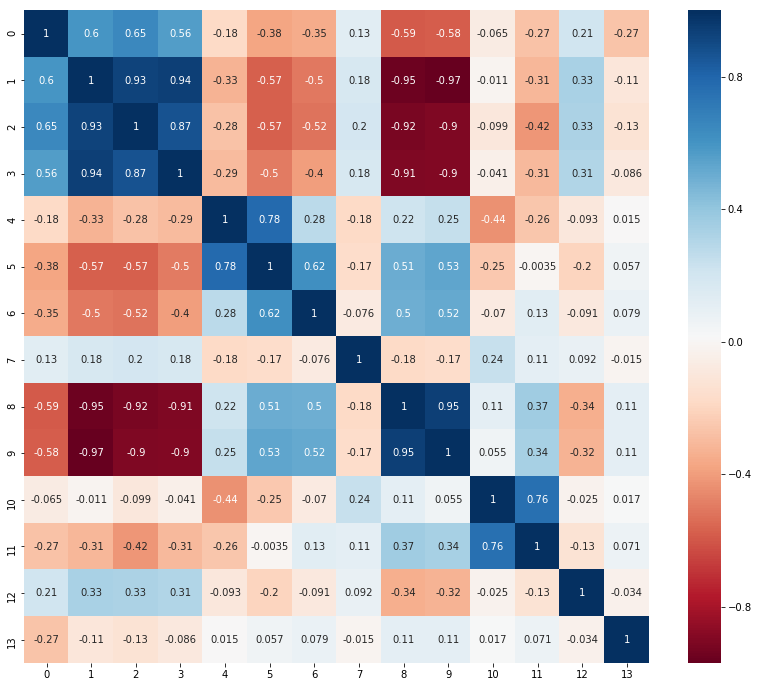

In [7]:

import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
#plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.astype(float).corr(),cmap=colormap, annot=True)

In [8]:
#plt.figure(figsize=(14,20))
#g = sns.pairplot(train, hue="result",palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
#g.set(xticklabels=[])

### KNN


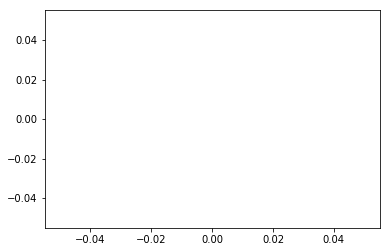

('score:', 0.77942)
('cv score:', 0.7253875)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
import time
Y_train = np.array(Y_train)
Y_train = Y_train.ravel()
f,ax = plt.subplots(1,1)
ids = range(0,X_test.shape[0])
xs = []
ys = []
'''
for i in range(3, 50,5):
    print("Neighbhors:",i)
    knn = KNeighborsClassifier(n_neighbors=i, p=2,n_jobs=-1)
    knn.fit(X_train,Y_train)
    cv = ShuffleSplit(n_splits=4,random_state=0)
    scores = cross_val_score(knn, X_train, Y_train, cv=cv).mean()
    xs.append(i)
    ys.append(scores)
    print("Scores:",scores)
'''
ax.plot(xs,ys)
plt.show()
knn = KNeighborsClassifier(n_neighbors=8, p=2,n_jobs=-1)

knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
cv = ShuffleSplit(n_splits=4,random_state=0)
scores = cross_val_score(knn, X_train, Y_train, cv=cv).mean()
print("score:",knn.score(X_train,Y_train))
print("cv score:",scores)

### Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

'''
for i in range(7, 32,1):
    print("Depth:",i)
    random_forest = RandomForestClassifier(max_depth = i)
    random_forest.fit(X_train,Y_train)
    cv = ShuffleSplit(n_splits=4,random_state=0)
    scores = cross_val_score(random_forest, X_train, Y_train, cv=cv)
    
    print("Scores:",scores)
'''
'''
submission = pd.DataFrame({ 'ID': list(id),
                            'Prob1': Y_pred1 })
submission.to_csv("submission3.csv",index=False)
'''
random_forest = RandomForestClassifier(max_depth = 23)
random_forest.fit(X_train,Y_train)
Y_pred1 = random_forest.predict(X_test)
cv = ShuffleSplit(n_splits=4,random_state=0)
scores = cross_val_score(random_forest, X_train, Y_train, cv=cv).mean()
print("score:",random_forest.score(X_train,Y_train))
print("cv score:",scores)
print("feature importance:", random_forest.feature_importances_)


('score:', 0.895365)
('cv score:', 0.7292125)
('feature importance:', array([0.21298004, 0.03936516, 0.07911346, 0.06609025, 0.07194487,
       0.0471123 , 0.01268603, 0.06485646, 0.0721815 , 0.05083022,
       0.07256535, 0.08259365, 0.05120276, 0.07647794]))


### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
start_time = time.time()
lr = LogisticRegression(max_iter = 200)
lr.fit(X_train,Y_train)
print("--- %s seconds ---" % (round(time.time() - start_time,2)))
print(lr.score(X_train,Y_train))
cv = ShuffleSplit(n_splits=4,random_state=0)
scores = cross_val_score(lr, X_train, Y_train, cv=cv).mean()
print("cv score:",scores)
y_pred2 = lr.predict(X_test)

submission = pd.DataFrame({ 'ID': list(ids),
                            'Prob1': y_pred2 })
submission.to_csv("submission4.csv",index=False)

--- 4.14 seconds ---
0.688485
('cv score:', 0.6890375000000001)


'\nsubmission = pd.DataFrame({ \'ID\': list(ids),\n                            \'Prob1\': y_pred2 })\nsubmission.to_csv("submission4.csv",index=False)'

### SVC

In [12]:
from sklearn.svm import SVC
start_time = time.time()
svm = SVC(max_iter=2000)
svm.fit(X_train,Y_train)
print("--- %s seconds ---" % (round(time.time() - start_time,2)))
print(svm.score(X_train,Y_train)) 
cv = ShuffleSplit(n_splits=4,random_state=0)
scores = cross_val_score(svm, X_train, Y_train, cv=cv).mean()
print("cv score:",scores)
y_pred3 = svm.predict(X_test)

D:\Program Files\anaconda\envs\py27\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


--- 53.3 seconds ---
0.528735
('cv score:', 0.5483750000000001)


pca,delete some features, adaboost


### Adaboost

In [ ]:
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
start_time = time.time()
ada = AdaBoostClassifier(n_estimators = 500,learning_rate=0.75)
ada.fit(X_train,Y_train)
print("--- %s seconds ---" % (round(time.time() - start_time,2)))
print(svm.score(X_train,Y_train)) 
scores = cross_val_score(ada, X_train, Y_train, cv=cv)
print("cv score:",scores)
print("feature importance:",ada.feature_importances_)
y_pred4 = ada.predict(X_test)

### Gradient boost

In [ ]:
start_time = time.time()
gb = GradientBoostingClassifier(n_estimators = 500)
gb.fit(X_train,Y_train)
print("--- %s seconds ---" % (round(time.time() - start_time,2)))
print(gb.score(X_train,Y_train)) 
scores = cross_val_score(gb, X_train, Y_train, cv=cv)
print("cv score:",scores)
print("feature importance:",gb.feature_importances_)
y_pred5 = gb.predict(X_test)